In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*- #

# ------------------------------------------------------------------------------
#
#   Copyright (C) 2022 Concordia NAVlab. All rights reserved.
#
#   @Filename: draw_depth_estimation_res.py
#
#   @Author: Shun Li
#
#   @Date: 2022-01-13
#
#   @Email: 2015097272@qq.com
#
#   @Description:
#
# ------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D

In [2]:
depth_whole = pd.read_csv("/home/ls/m300_depth_filter/m300_depth_filter/build/depth_estimation.csv")
depth_whole

,index,x,y,z,Unnamed: 4
0,18,0.670696,-0.192121,15.679469,NaN
1,18,0.581329,-0.041422,15.715734,NaN
2,18,0.626220,-0.033856,15.702120,NaN
3,18,0.621466,-0.050060,16.168106,NaN
4,18,0.552432,-0.030133,15.764987,NaN
...,...,...,...,...,...
5167,207,0.717624,0.131298,19.434370,NaN
5168,207,0.795641,0.009321,19.549887,NaN
5169,207,0.656836,0.037716,19.603922,NaN
5170,207,1.244398,0.141931,19.557676,NaN


In [3]:
x = depth_whole["x"].to_numpy()
y = depth_whole["y"].to_numpy()
z = depth_whole["z"].to_numpy()
index = depth_whole["index"].to_numpy()

cond = z < 40
x = x[cond]
y = y[cond]
z = z[cond]
index = index[cond]


In [45]:
font1 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 16,
}

In [5]:
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

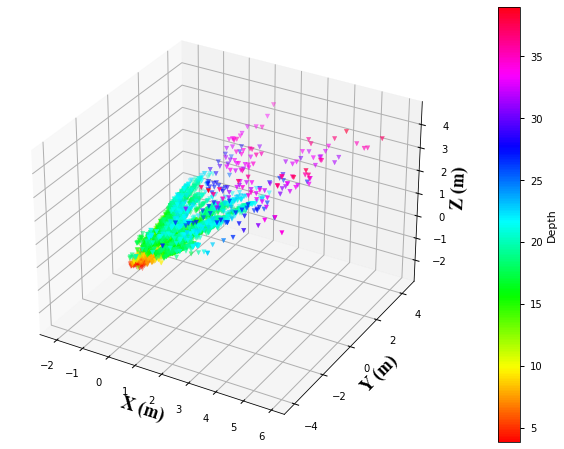

In [44]:
style.use('seaborn-notebook')

fig = plt.figure(figsize=[20,8])
ax = fig.gca(projection='3d')

p2 = ax.scatter3D(standardization(x), standardization(y), standardization(z), marker = "v",
                  label='Real Trajectory', c=z, cmap="hsv")

ax.set_xlabel('X (m)', font=font1) # 画出坐标轴
ax.set_ylabel('Y (m)', font=font1)
ax.set_zlabel('Z (m)', font=font1)
fig.colorbar(p2,label="Depth")

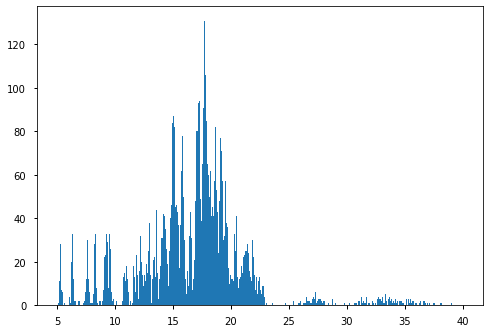

In [7]:
style.use('seaborn-notebook')
n, bins_limits, patches = plt.hist(z, bins=400,range=[5,40])

In [13]:
# find the mid value
sort_z = np.sort(z)
mid = sort_z[int(sort_z.size/2)]
mid

17.152914047

In [18]:
# calculate the sigma
sigma = np.sqrt(1/z.size * np.sum((z-mid)**2))
sigma

5.1261776421105365

In [23]:
lb = mid - 3 * sigma
ub = mid + 3 * sigma
cull_cond = np.logical_and(z>lb, z<ub)
z_refine = z[cull_cond]

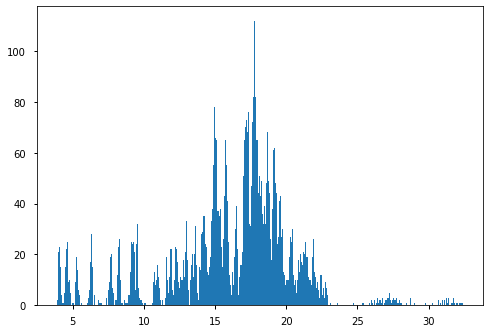

In [25]:
style.use('seaborn-notebook')
n, bins_limits, patches = plt.hist(z_refine, bins=400)

In [27]:
sort_refine_z = np.sort(z_refine)
refine_mid = sort_refine_z[int(sort_refine_z.size/2)]
refine_mid

17.105690002